In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb 
print('Done')

Done


In [2]:
data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

In [3]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
data_train=data_train.drop(columns=['Ticket', 'Fare', 'Cabin', 'Embarked','Name'])
data_test=data_test.drop(columns=['Ticket', 'Fare', 'Cabin', 'Embarked','Name'])

In [9]:
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0


In [10]:
data_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1


In [11]:
data_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
dtype: int64

In [12]:
data_test.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
dtype: int64

In [13]:
data_test['Age'].max()

76.0

In [14]:
data_test['Age'].min()

0.17

In [15]:
data_train['Age']=data_train['Age'].fillna(data_train['Age'].median())
data_test['Age']=data_test['Age'].fillna(data_test['Age'].median())

In [16]:
data_test['Age'].isna().sum()

0

In [17]:
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0


In [18]:
data_train.head()
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

## Standardizing

In [19]:
scaler=preprocessing.StandardScaler()
data_train[['Pclass','Age', 'SibSp', 'Parch']]=scaler.fit_transform(data_train[['Pclass','Age', 'SibSp', 'Parch']])
data_test[['Pclass','Age', 'SibSp', 'Parch']]=scaler.fit_transform(data_test[['Pclass','Age', 'SibSp', 'Parch']])

C:\Users\mnmureithi\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mnmureithi\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\mnmureithi\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mnmureithi\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [20]:
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,0.827377,male,-0.565736,0.432793,-0.473674
1,2,1,-1.566107,female,0.663861,0.432793,-0.473674
2,3,1,0.827377,female,-0.258337,-0.474545,-0.473674
3,4,1,-1.566107,female,0.433312,0.432793,-0.473674
4,5,0,0.827377,male,0.433312,-0.474545,-0.473674


In [21]:
data_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,0.873482,male,0.386231,-0.499470,-0.400248
1,893,0.873482,female,1.371370,0.616992,-0.400248
2,894,-0.315819,male,2.553537,-0.499470,-0.400248
3,895,0.873482,male,-0.204852,-0.499470,-0.400248
4,896,0.873482,female,-0.598908,0.616992,0.619896


## One hot Encoding

In [22]:
data_train=pd.get_dummies(data_train,columns=['Sex'])
data_test=pd.get_dummies(data_test,columns=['Sex'])

In [23]:
data_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,892,0.873482,0.386231,-0.499470,-0.400248,0,1
1,893,0.873482,1.371370,0.616992,-0.400248,1,0
2,894,-0.315819,2.553537,-0.499470,-0.400248,0,1
3,895,0.873482,-0.204852,-0.499470,-0.400248,0,1
4,896,0.873482,-0.598908,0.616992,0.619896,1,0


In [24]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch',
       'Sex_female', 'Sex_male'],
      dtype='object')

## Modelling

In [25]:
x=data_train[['Pclass', 'Age', 'SibSp', 'Parch','Sex_female', 'Sex_male']]
y=data_train['Survived']

In [26]:
x_test=data_test[['Pclass', 'Age', 'SibSp', 'Parch','Sex_female', 'Sex_male']]

In [27]:
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.3,random_state=8)

In [28]:
#Models
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
lr=LogisticRegression()
gb=GradientBoostingClassifier(n_estimators=40)

In [52]:
xgb=xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)

### KNN

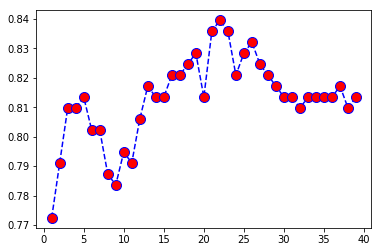

In [30]:
best_k=[]
for k in range(1,40):
    #k=k+1
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_valid)
    acc=accuracy_score(y_valid,pred_i)
    best_k.append(acc)
    
plt.plot(range(1,40), best_k,ls='--',color='blue',marker='o',markerfacecolor='red',markersize=10)

In [31]:
 knn=KNeighborsClassifier(n_neighbors=23)

In [32]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=23, p=2,
           weights='uniform')

In [33]:
prediction=knn.predict(x_valid)

In [34]:
print(classification_report(y_valid,prediction))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       168
           1       0.81      0.73      0.77       100

   micro avg       0.84      0.84      0.84       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.84      0.83       268



In [35]:
print(confusion_matrix(y_valid,prediction))

[[151  17]
 [ 27  73]]


In [36]:
acc=accuracy_score(y_valid,prediction)
acc

0.835820895522388

### Random Forest

In [37]:
rf.fit(x_train,y_train)

C:\Users\mnmureithi\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
predrf=rf.predict(x_valid)

In [40]:
from sklearn import metrics
mae2=metrics.mean_absolute_error(y_valid,predrf)
mae2

0.1828358208955224

In [41]:
#Random forest classifier ~ accuracy
accrf=accuracy_score(y_valid,predrf)
accrf

0.8171641791044776

### Logistic regression

In [42]:
lr.fit(x_train,y_train)

C:\Users\mnmureithi\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
predlr=lr.predict(x_valid)

In [44]:
from sklearn.metrics import log_loss
log_loss(y_valid, predlr)

6.830483364492573

## GradientBoosting

In [45]:
gb.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=40,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [46]:
predgb=gb.predict(x_valid)

In [47]:
accgb=accuracy_score(y_valid,predgb)
accgb

0.8246268656716418

### XGB classifier

In [54]:
xbg=xgb.fit(x_train,y_train)

In [55]:
predxg=xgb.predict(x_valid)

In [56]:
accxg=accuracy_score(y_valid,predxg)
accxg

0.832089552238806

## Final data

In [59]:
#XGBclassifier is the best
survival=xgb.predict(x_test).astype(int)
survival

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [60]:
data_test['survival']=survival

In [63]:
data_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,survival
0,892,0.873482,0.386231,-0.499470,-0.400248,0,1,0
1,893,0.873482,1.371370,0.616992,-0.400248,1,0,0
2,894,-0.315819,2.553537,-0.499470,-0.400248,0,1,0
3,895,0.873482,-0.204852,-0.499470,-0.400248,0,1,0
4,896,0.873482,-0.598908,0.616992,0.619896,1,0,1


In [62]:
data_test.isna().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Sex_female     0
Sex_male       0
survival       0
dtype: int64

In [64]:
data_test.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female',
       'Sex_male', 'survival'],
      dtype='object')

In [65]:
submission=data_test[['PassengerId','survival']]

In [66]:
submission.head()

,PassengerId,survival
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
import pandas as pd
